# DATA HANDLING WITH PANDAS

<section>There is 3 steps which always must be done when we handle data in pandas:</section>
<ol>
    <li>DATA PREPARITION</li>
    <li>DATA TRANSFORMATION</li>
    <li>DATA AGGREGATION</li>
</ol>

## DATA PREPARITION

Mostly this kind of operations are invlved:
<ol>
    <li>Loading</li>
    <li>Assembling</li>
    <li><b><u>Merging</u></b></li>
    <li>Concatenating</li>
    <li>Combining</li>
    <li>Reshaping</li>
    <li>Removing</li>
</ol>


In [68]:
import numpy as np
import pandas as pd
import mysql.connector as mysql
import matplotlib.pyplot as plt
import seaborn as sns
dbCon = mysql.connect(host='localhost',user='root',password='AN003722040592la',database='sap_export_30')
# qry = "SELECT * FROM ltap LIMIT 100"
qry = "SELECT * FROM hr_dev.berkatok;"
dfto = pd.read_sql(qry,dbCon)
#qry = "SELECT * FROM invntry.usr_tbl;"
qry = "SELECT * FROM invntry.usr_tbl;"
dfusr = pd.read_sql(qry,dbCon)

In [2]:
dfto.head()

,mrkt_id,mrkt_lrs
0,1,"[72, 97, 118, 105, 98, 195, 169, 114, 101, 115]"
1,2,"[195, 147, 114, 97, 98, 195, 169, 114, 101, 115]"
2,3,"[70, 105, 120, 32, 98, 195, 169, 114, 101, 115]"
3,4,"[69, 103, 121, 195, 169, 98, 32, 98, 195, 169,..."
4,999,"[77, 101, 103, 104, 97, 116, 195, 161, 114, 11..."


In [3]:
# Kind of interesting thing:
# is the databse has collation: bi [= bINARY] then we getback
# BYTEARRAY, an not sting, here we convert them back to strings 
# dfusr['saplogin'] = dfusr['saplogin'].str.decode('utf-8')
# dfusr['teljNev'] = dfusr['teljNev'].str.decode('utf-8')
# dfusr['teamNev'] = dfusr['teamNev'].str.decode('utf-8')

In [4]:
dfusr.head()

,usr_id,usripn,usrVezNev,usrKzpNev,usrKerNev,usr_role,pwd_hash,lvl1MngId,usr_email,init_ltrs_code,is_active,is_present,cntr_type,is_avlbl_for_cnt,img_path
0,1,AX07055,Antal,Ildikó,Ágnes,8,C70B5DD9EBFB6F51D09D4132B7170C9D20750A7852F006...,1,agnes.antal@reanult.hu,AAL,1,1,-1,1,/INVNTRY_02/PIX/USRS/antal_agnes.jpg
1,2,AX07206,Árvai,,László,1,C70B5DD9EBFB6F51D09D4132B7170C9D20750A7852F006...,1,laszlo.arvai@reanult.hu,LAI,1,1,2,1,/INVNTRY_02/PIX/USRS/arvai_laszlo.jpg
2,3,AX07207,Avar,,Péter,2,C70B5DD9EBFB6F51D09D4132B7170C9D20750A7852F006...,1,peter.avar@reanult.hu,PAR,1,1,4,1,/INVNTRY_02/PIX/USRS/avar_peter.jpg
3,4,AX22816,Babiák,,Nikoleta,5,C70B5DD9EBFB6F51D09D4132B7170C9D20750A7852F006...,1,nikoleta.babiak@reanult.hu,NBK,1,1,0,1,/INVNTRY_02/PIX/USRS/ACE_FEMALE.jpg
4,5,AX16747,Bakos,,Szabolcs,1,C70B5DD9EBFB6F51D09D4132B7170C9D20750A7852F006...,1,szabolcs.bakos@reanult.hu,SBS,1,1,3,1,/INVNTRY_02/PIX/USRS/bakos_szabolcs.jpg


In [5]:
dfto.head(1)
dfto.info

<bound method DataFrame.info of    mrkt_id                                           mrkt_lrs
0        1    [72, 97, 118, 105, 98, 195, 169, 114, 101, 115]
1        2   [195, 147, 114, 97, 98, 195, 169, 114, 101, 115]
2        3    [70, 105, 120, 32, 98, 195, 169, 114, 101, 115]
3        4  [69, 103, 121, 195, 169, 98, 32, 98, 195, 169,...
4      999  [77, 101, 103, 104, 97, 116, 195, 161, 114, 11...>

In [6]:
# pd.merge(dfto,dfusr,left_on='cnfUsr',right_on='saplogin')

In [7]:
# MERGE = JOIN
# Syntax:
# pd.merge(Table_A, Table_B,columnA,columnB,[left,right,outer,inner])
# dfMrgd = pd.merge(dfto,dfusr,left_on='cnfUsr',right_on='saplogin')
# dfMrgd = pd.merge(dfto,dfusr,left_on='cnfUsr',right_on='saplogin',how='right')
# dfMrgd = pd.merge(dfto,dfusr,left_on='cnfUsr',right_on='saplogin',how='left')

In [8]:
# dfMrgd.head()

In [9]:
# dfMrgd.info()
# dfMrgd.shape

## Lets see some PIVOTing

<em style="font-weight:bold;color:#FF6666;font-size:18px;">Stacking</em> = rotates of pivots the dataframe, converting columns to rows<br>
<em style="font-weight:bold;color:#FF6666;font-size:18px;">Unstacking</em> = Converts rows into columns

In [10]:
frame = pd.DataFrame(np.arange(9).reshape(3,3),index=['fehér','fekete','vörös'],columns=['labda','toll','ceruza'])

In [11]:
frame

,labda,toll,ceruza
fehér,0,1,2
fekete,3,4,5
vörös,6,7,8


In [12]:
ser5 = frame.stack()

In [13]:
ser5

fehér   labda     0
        toll      1
        ceruza    2
fekete  labda     3
        toll      4
        ceruza    5
vörös   labda     6
        toll      7
        ceruza    8
dtype: int64

In [14]:
ser6 = frame.unstack()

In [15]:
ser6

labda   fehér     0
        fekete    3
        vörös     6
toll    fehér     1
        fekete    4
        vörös     7
ceruza  fehér     2
        fekete    5
        vörös     8
dtype: int64

In [16]:
ser7 = ser5.unstack()

In [17]:
ser7

,labda,toll,ceruza
fehér,0,1,2
fekete,3,4,5
vörös,6,7,8


In [18]:
ser8 = ser5.unstack(0)

In [19]:
ser8

,fehér,fekete,vörös
labda,0,3,6
toll,1,4,7
ceruza,2,5,8


In [20]:
# In case of unstack we can give the number of the column genertor index among the hierarchical indices
ser8 = ser5.unstack(1)

In [21]:
ser8

,labda,toll,ceruza
fehér,0,1,2
fekete,3,4,5
vörös,6,7,8


## Pivot from long to wide

In this case we have a "long" datarange. For example a logfile, or something like a sensor reading fro long time.
This means, that the categries, which normally can be handled as columns, are in separated rows instead.
Lets see, how can we crate columns fom them.
----------------------------------------------------------------------------------------------

In [22]:
longframe = pd.DataFrame({'szin':['fehér','fehér','fehér','fekete','fekete','fekete','piros','piros','piros'],
            'cikk':['labda','toll','bögre','labda','toll','bögre','labda','toll','bögre'],
            'ár':np.random.rand(9)})

In [23]:
longframe

,szin,cikk,ár
0,fehér,labda,0.331730
1,fehér,toll,0.039567
2,fehér,bögre,0.682820
3,fekete,labda,0.632445
4,fekete,toll,0.835913
5,fekete,bögre,0.911614
6,piros,labda,0.344978
7,piros,toll,0.279022
8,piros,bögre,0.903371


<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">Well, in this case the set is quite long.<br>To make it more readable, we can make a wide one from this.<br>
For this operation the DF.pivot() function comes in handy!</p>

In [24]:
wideframe = longframe.pivot('szin','cikk')

In [25]:
wideframe

ár                    
cikk       bögre     labda      toll
szin                                
fehér   0.682820  0.331730  0.039567
fekete  0.911614  0.632445  0.835913
piros   0.903371  0.344978  0.279022

<p 
style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
As we can see here, we got  simple price table, with the color, and item names as categories.</p>

## The last element: REMOVING
--------------------------------------------------------------
In this section we see how can we remove rows, or columns

In [26]:
frame1 = pd.DataFrame(np.arange(9).reshape(3,3),
                     index=['fehér','fekete','piros'],
                     columns=['labda','toll','csésze'])

In [27]:
frame1

,labda,toll,csésze
fehér,0,1,2
fekete,3,4,5
piros,6,7,8


<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
Lets see how can we get rid of a column:<br>
Easy: we just need the del command:<br>
<code>del frame1['labda']<code>
</p>

In [28]:
del frame1['labda']

In [29]:
frame1

,toll,csésze
fehér,1,2
fekete,4,5
piros,7,8


<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
Instead, if we want to delete some <b><u>rows</u></b>:<br>
Easy: we just need the <b><u>drop</u></b> command, and an <em>index</em>:<br>
<code>frame1.drop['fekete']<code>
</p>

In [30]:
frame1 = frame1.drop('fekete')
frame1

,toll,csésze
fehér,1,2
piros,7,8


<p style="color:#CC9999;background-color:#660505;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
From the above examples it easy to see, that in case of del, the modification hapens instantly on the dataframe, and you can get back the original data with re-creation of the dataset.<br>
-----------------------------------------------------------------------------------------------------------<br>
While in the case of drop, it is the contrary, you need to assign the rsult of the operation to a (new) dataframe, to have a constant result.
</p>

# -------------------------------------------------------------------------------------------------------
# DATA TRANSFORMATION
# -------------------------------------------------------------------------------------------------------

<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
In the former section, we did the data preparition, which was mainly about <b>re-structurizing</b> our existing data, now we begin the data transformation phase.<br>
While in the former section we mostly changed the structure of the data, columns, rows, re-structuring of these ones, deleting, or create on from the other, now we focus on the data content itslef.
</p>

## Removing duplicates

<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
Sometimes we need to get rid of duplicate records, which can be regarded as "niose" in our data.
</p>

In [31]:
dFrm = pd.DataFrame({'szin':['fehér','fehér','piros','piros','fehér'],
                    'érték':[2,1,3,3,2]})

In [32]:
dFrm

,szin,érték
0,fehér,2
1,fehér,1
2,piros,3
3,piros,3
4,fehér,2


<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
To find the duplicated elements, the <code>df.duplicated()</code> function helps us, which gives us back a well known boolean array.
</p>

In [33]:
dFrm.duplicated()

0    False
1    False
2    False
3     True
4     True
dtype: bool

<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
If we have such a boolean array, then we can use it with some array magix.
</p>

In [34]:
dFrm[dFrm.duplicated()]

,szin,érték
3,piros,3
4,fehér,2


<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
For the same purpose, there is the <code>drop_duplicates()</code> function, which returns with a duplication-free version of the original dataset.
</p>

In [35]:
dFrm.drop_duplicates()

,szin,érték
0,fehér,2
1,fehér,1
2,piros,3


## Mapping
---------------------------------------------------------------------------------------------------<br>
Mapping is a process in which we can make a kind of bond between two elements.<br>
From this we can see, that there is no better object for mapping than the <b>dictionary</b>!<br>
<code>
map = {
    'label1' : 'value1'
    'label2' : 'value2'
    ...
}</code><br>
There is 3 mainly used function here, and all of them accepts a dictionary as parameter.
<ul>
    <li>replace() = replaces values</li>
    <li>map() = creates new column</li>
    <li>rename() = replaces the index values</li>
   </ul>
 ==================================================================================================

### <i><u>Replace values via mapping</u></i>

<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
Lets see for example a dataframe, which contains same colors, but on a foreign language, which should be considered the same value as defined on native language. In this case the foreign language values should be replaced with their native pairs.
</p>

In [36]:
frm = pd.DataFrame({'item':['labda','váza','poló','ceruza','hamutartó'],
                    'color':['fehér','rosso','verde','fekete','sárga'],
                    'price':[556,420,130,56,275]})

In [37]:
frm

,item,color,price
0,labda,fehér,556
1,váza,rosso,420
2,poló,verde,130
3,ceruza,fekete,56
4,hamutartó,sárga,275


In [38]:
#1 step: define the replacer dictionary:
newcolors = {'rosso':'piros','verde':'zöld'}
#2 step make the replace:
frm.replace(newcolors)

,item,color,price
0,labda,fehér,556
1,váza,piros,420
2,poló,zöld,130
3,ceruza,fekete,56
4,hamutartó,sárga,275


In [40]:
# The most common case is the replacing of NaN-s:
ser = pd.Series([1,3,np.nan,4,6,np.nan,3])
ser

0    1.0
1    3.0
2    NaN
3    4.0
4    6.0
5    NaN
6    3.0
dtype: float64

In [41]:
# Here we replace the numpy NaN value with 0-s
ser = ser.replace(np.nan,0)
ser

0    1.0
1    3.0
2    0.0
3    4.0
4    6.0
5    0.0
6    3.0
dtype: float64

### Adding values via <em style="color:#FF55FF;">mapping</em>

In [42]:
# In this case we are exploiting mapping to add values in a column depending on the values contained in another.
# The mapping will always be defined separately.
f = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
    'color':['white','red','green','black','yellow']})
f

,item,color
0,ball,white
1,mug,red
2,pen,green
3,pencil,black
4,ashtray,yellow


In [43]:
# Let’s suppose you want to add a column to indicate the price of the item shown in the dataframe. 
# You have a price list in which the price for each type of item is described (a dict
# object that contains a list of prices for each type of item).
prices = {
'ball' : 5.56,
'mug' : 4.20,
'bottle' : 1.30,
'scissors' : 3.41,
'pen' : 1.30,
'pencil' : 0.56,
'ashtray' : 2.75}
# The map() function applied to a series (or to a column of a dataframe) accepts a function or an object 
# containing a dict with mapping. So we can apply the mapping of the prices on the column item, to add 
# a column to the price dataframe.
f['price'] = f['item'].map(prices)
f

,item,color,price
0,ball,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


### Rename the indexes of the axes

<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">Mapping can applied even for the indexes. or this we can use rename() 
function with (of course) a dict object.</p> 


In [45]:
f

,item,color,price
0,ball,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


In [46]:
reindexDict = {
    0:'Zero',
    1:'First',
    2:'Second',
    3:'Third',
    4:'Fourth',
}
f.rename(reindexDict)


,item,color,price
Zero,ball,white,5.56
First,mug,red,4.20
Second,pen,green,1.30
Third,pencil,black,0.56
Fourth,ashtray,yellow,2.75


<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">If we want to rename COLUMNS we need an extra parameter, &quot;columns&quot;.
 <br>But for this we also need a renaming dict!</p>

In [48]:
reNmColumnsDict = {'item':'Tétel','color':'Szín','price':'Ár'}
f.rename(index=reindexDict,columns=reNmColumnsDict)

,Tétel,Szín,Ár
Zero,ball,white,5.56
First,mug,red,4.20
Second,pen,green,1.30
Third,pencil,black,0.56
Fourth,ashtray,yellow,2.75


<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
A quick note: this rename() function also return back with a midified copy, and do not touch the original data,
so if you want to keep the result, you need to save it into a new object, (or try <code>inplace=true</code>).</p>

## DISCRETIZATION and BINNING

<p style="color:#6666CC;background-color:#050566;padding:18px;border:4px solid #050566;border-radius:8px;box-shadow:4px 4px 8px #050505;">
In case of DISCRETIZATION, we are in the situation, when we want to convert some kind of data into a categroical
value range.<br>
This can be a continous, or only a lot of discrete eleemnts. If we need to convert this to a smaller array, we
use some kind of discretization.<br>
In case of binning we also do a kind of discretization. The most relevant example maybe the HISTOGRAM.</p> 

In [49]:
# Lets see some example:
results = [12,34,67,55,28,90,99,12,3,56,74,44,87,23,49,89,87]

In [50]:
# Assume, that we know, that th values are ranged between 0,and 100. Now define the bins:
bins = [0,25,50,75,100]
# Now wih the bins and the help of the cut() function we can get an arra, which gives us the relevan bin, for all
# the items in our series
cats = pd.cut(results,bins)
cats

[(0, 25], (25, 50], (50, 75], (50, 75], (25, 50], ..., (75, 100], (0, 25], (25, 50], (75, 100], (75, 100]]
Length: 17
Categories (4, interval[int64]): [(0, 25] < (25, 50] < (50, 75] < (75, 100]]

In [51]:
# The result has a member "categories" which we can check, and get the bin list:
cats.categories

IntervalIndex([(0, 25], (25, 50], (50, 75], (75, 100]],
              closed='right',
              dtype='interval[int64]')

In [52]:
# The result has also a member "codes" which contains the id of the bins for all element:
cats.codes

array([0, 1, 2, 2, 1, 3, 3, 0, 0, 2, 2, 1, 3, 0, 1, 3, 3], dtype=int8)

In [53]:
# With the good old value_counts we can even check the counts in categories:
pd.value_counts(cats)

(75, 100]    5
(50, 75]     4
(25, 50]     4
(0, 25]      4
dtype: int64

<AxesSubplot:>

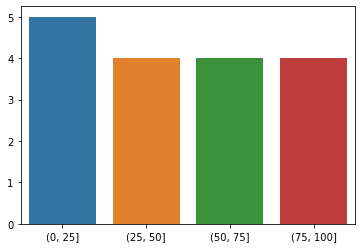

In [57]:
sns.barplot(x=cats.categories,y=pd.value_counts(cats))

In [60]:
# One specialty of cut=() function:
# we can add name to the bins instead of seeing their definitions!
# For this we have to use the "lables" parameter
bin_names=['kevés','elegendő','megfelelő','jó','sok']
bins = [0,20,40,60,80,100]
cats = pd.cut(results,bins=bins,labels=bin_names)

<AxesSubplot:>

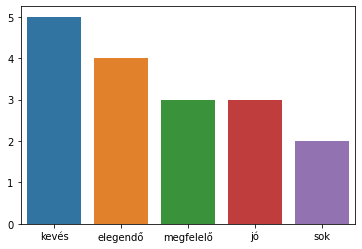

In [62]:
sns.barplot(x=cats.categories,y=pd.value_counts(cats))

In [63]:
# There is a convenient use of the cut() function in which we can use only one integer insted of bin ranges 
# defined in a list. 
# In this case, pandas will define such number of bins, we use as parameters.
cats2 = pd.cut(results,10)

In [64]:
cats2.categories

IntervalIndex([(2.904, 12.6], (12.6, 22.2], (22.2, 31.8], (31.8, 41.4], (41.4, 51.0], (51.0, 60.6], (60.6, 70.2], (70.2, 79.8], (79.8, 89.4], (89.4, 99.0]],
              closed='right',
              dtype='interval[float64]')

<AxesSubplot:>

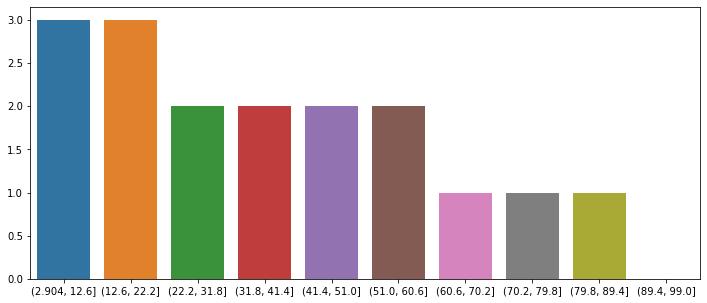

In [70]:
plt.figure(figsize=(12,5))
sns.barplot(x=cats2.categories,y=pd.value_counts(cats2))